# **Chapter 1 - Building 2-layer maps : combining polygons and scatterplots**

## **Styling a scatterplot**


In this exercise, you'll be using plt.scatter() to plot the father and son height data from the video. The father_son DataFrame has been pre-loaded for you. In each scatterplot, plot father_son.fheight as x-axis and father_son.sheight as y-axis.

In [6]:
import pandas as pd
father_son = pd.read_excel('father_son.xlsx')

In [7]:
father_son.head()

,Unnamed: 0,fheight,sheight
0,1,65.049,59.778
1,2,63.251,63.214
2,3,64.955,63.342
3,4,65.752,62.792
4,5,61.137,64.281


In [8]:
father_son.describe()

,Unnamed: 0,fheight,sheight
count,1078.000000,1078.000000,1078.000000
mean,539.500000,67.687101,68.684069
std,311.336099,2.744871,2.814703
min,1.000000,59.008000,58.507000
25%,270.250000,65.788000,66.931250
50%,539.500000,67.766500,68.616000
75%,808.750000,69.603000,70.466000
max,1078.000000,75.434000,78.365000


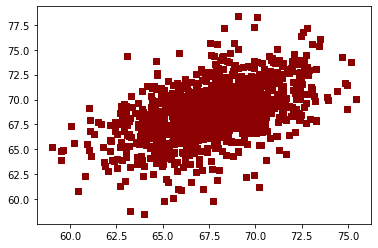

In [10]:
# Import matplotlib.pyplot
import matplotlib.pyplot as plt

# Scatterplot 1 - father heights vs. son heights with darkred square markers
plt.scatter(father_son.fheight, father_son.sheight, c = 'darkred', marker = 's')

# Show your plot
plt.show()

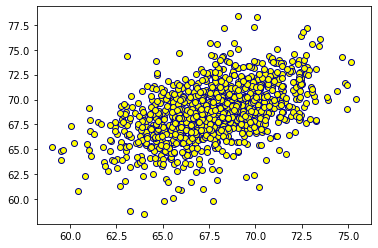

In [11]:
# Scatterplot 2 - yellow markers with darkblue borders
plt.scatter(father_son.fheight, father_son.sheight, c = 'yellow', edgecolor = 'darkblue')

# Show the plot
plt.show()

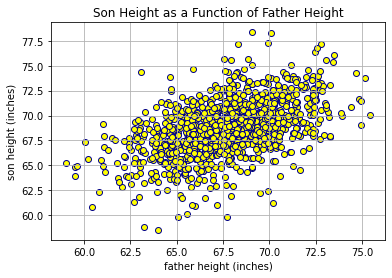

In [13]:
# Scatterplot 3
plt.scatter(father_son.fheight, father_son.sheight,  c = 'yellow', edgecolor = 'darkblue')
plt.grid()
plt.xlabel('father height (inches)')
plt.ylabel('son height (inches)')
plt.title('Son Height as a Function of Father Height')

# Show your plot
plt.show()

# **Extracting longitude and latitude**

A DataFrame named df has been pre-loaded for you. Complete the code to extract longitude and latitude to new, separate columns.

In [20]:
df = pd.read_excel('Extracting longitude and latitude.xlsx')

In [21]:
df

,StopId,StopName,Location
0,4431,MUSIC CITY CENTRAL 5TH - BAY 11,"(36.16659, -86.781996)"
1,588,CHARLOTTE AVE & 7TH AVE N WB,"(36.165, -86.78406)"
2,590,CHARLOTTE AVE & 8TH AVE N WB,"(36.164393, -86.785451)"
3,541,11TH AVE / N GULCH STATION OUTBOUND,"(36.162249, -86.790464)"


In [22]:
df.describe()

,StopId
count,4.000000
mean,1537.500000
std,1929.132879
min,541.000000
25%,576.250000
50%,589.000000
75%,1550.250000
max,4431.000000


In [23]:
df['Location'] = df['Location'].str.strip('()').str.split(',')

In [24]:
df.head()

,StopId,StopName,Location
0,4431,MUSIC CITY CENTRAL 5TH - BAY 11,"[36.16659, -86.781996]"
1,588,CHARLOTTE AVE & 7TH AVE N WB,"[36.165, -86.78406]"
2,590,CHARLOTTE AVE & 8TH AVE N WB,"[36.164393, -86.785451]"
3,541,11TH AVE / N GULCH STATION OUTBOUND,"[36.162249, -86.790464]"


In [26]:
# extract latitude to a new column: lat
df['lat'] = [loc[0] for loc in df.Location]

# extract longitude to a new column: lng
df['lng'] = [loc[1] for loc in df.Location]

df

,StopId,StopName,Location,lat,lng
0,4431,MUSIC CITY CENTRAL 5TH - BAY 11,"[36.16659, -86.781996]",36.16659,-86.781996
1,588,CHARLOTTE AVE & 7TH AVE N WB,"[36.165, -86.78406]",36.165,-86.78406
2,590,CHARLOTTE AVE & 8TH AVE N WB,"[36.164393, -86.785451]",36.164393,-86.785451
3,541,11TH AVE / N GULCH STATION OUTBOUND,"[36.162249, -86.790464]",36.162249,-86.790464


## **Plotting chicken locations**


Now you will create a scatterplot that shows where the Nashville chickens are!

In [29]:
# Load the dataset
chickens = pd.read_excel('chickens.xlsx')
chickens.head()

,permit,city,state,zip,district,date issued,lat,lng
0,288.0,Nashville,TN,37211,30.0,11/26/2014,36.029,-86.725
1,435.0,Nashville,TN,37211,19.0,05/18/2015,36.069,-86.755
2,270.0,Nashville,TN,37216,7.0,11/20/2014,36.236,-86.711
3,249.0,Nashville,TN,37216,25.0,12/29/2014,36.246,-86.751
4,200.0,Nashville,TN,37221,22.0,2014-10-12 00:00:00,36.029,-86.935


In [30]:
chickens.describe()

,permit,zip,district,lat,lng
count,307.000000,313.000000,310.000000,313.000000,313.000000
mean,297.990228,37191.041534,16.941935,36.136038,-86.765690
std,212.246673,53.432454,9.385135,0.070863,0.090009
min,2.000000,37013.000000,0.000000,35.971000,-87.005000
25%,210.000000,37205.000000,7.000000,36.084000,-86.822000
50%,284.000000,37210.000000,17.500000,36.136000,-86.767000
75%,411.500000,37215.000000,24.000000,36.186000,-86.707000
max,3277.000000,37221.000000,35.000000,36.395000,-86.104000


In [36]:
chickens.columns

Index(['permit       ', 'city ', 'state    ', 'zip  ', 'district ',
       'date issued     ', 'lat     ', 'lng'],
      dtype='object')

In [37]:
chickens.rename({'lat     ': 'lat'}, axis=1, inplace=True)

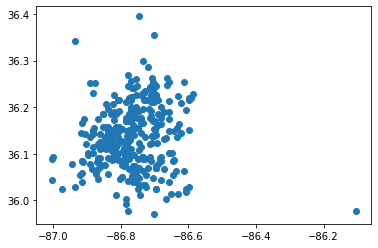

In [38]:
# Plot the locations of all Nashville chicken permits
plt.scatter(x = chickens.lng, y = chickens.lat)

# Show the plot
plt.show()

## **Creating a GeoDataFrame & examining the geometry**

In [40]:
%pip install geopandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 13.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.7/7.7 MB 66.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.0/16.0 MB 61.5 MB/s eta 0:00:00


In [43]:
# Import geopandas
import geopandas as gpd 

# Read in the services district shapefile and look at the first few rows.
school_district = gpd.read_file('/content/school_districts.geojson')
school_district.head()

,first_name,city,zip,email,state,last_name,address,position,term_expir,district,phone,geometry
0,Dr. Sharon,Nashville,37218,gentryfordistrict1@comcast.net,TN,Gentry,6108 Beals Lane,Member,2016,1,615-268-5269,"MULTIPOLYGON (((-86.77136 36.38357, -86.77134 ..."
1,Jill,Madison,37115,jill.speering@mnps.org,TN,Speering,1033 Falls Avenue,Vice-Chair,2016,3,615-562-5234,"MULTIPOLYGON (((-86.75365 36.40428, -86.75353 ..."
2,Dr. Jo Ann,Nashville,37220,joann.brannon@mnps.org,TN,Brannon,5444 San Marcos Drive,Member,2018,2,615-833-5976,"MULTIPOLYGON (((-86.76696 36.08333, -86.76590 ..."
3,Anna,Hermitage,37076,anna.shepherd@mnps.org,TN,Shepherd,4545 Raccoon Trail,Chair,2018,4,615-210-3768,"MULTIPOLYGON (((-86.58098 36.20935, -86.58099 ..."
4,Amy,Nashville,37221,amy.frogge@mnps.org,TN,Frogge,7237 Riverfront Drive,Member,2016,9,615-521-5650,"MULTIPOLYGON (((-86.97287 36.20828, -86.97045 ..."


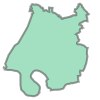

In [44]:
# Print the contents of the service districts geometry in the first row
school_district.loc[0, 'geometry']

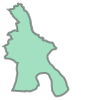

In [46]:
school_district.loc[1, 'geometry']

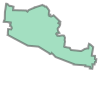

In [47]:
school_district.loc[2, 'geometry']

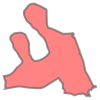

In [48]:
school_district.loc[3, 'geometry']

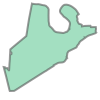

In [49]:
school_district.loc[4, 'geometry']

In [54]:
print(school_district.loc[4, 'geometry'])

MULTIPOLYGON (((-86.97287099971373 36.20827899971897, -86.97044799996338 36.2082409998749, -86.9693290002218 36.20830400017029, -86.96855099979942 36.20847400001844, -86.96726700028525 36.208287000275575, -86.96593199985173 36.20815100023981, -86.96488900017447 36.20793700017423, -86.9643219997168 36.20772300023568, -86.96386600025329 36.207678000179044, -86.96281899983713 36.20747300007095, -86.95810600001343 36.20630599979909, -86.95562800006677 36.20579800026604, -86.95431699990992 36.205553000113056, -86.95271000030046 36.205422000251104, -86.95211500032478 36.205312999823526, -86.95003700017023 36.20464099997354, -86.9482349997363 36.203842000223375, -86.94784599977584 36.203443999776475, -86.94780000016578 36.20341200016869, -86.94347199969104 36.19918300023547, -86.94167600017525 36.19526400001501, -86.94189199999386 36.17853600022805, -86.9418180000941 36.17533300027086, -86.94177600007257 36.174862000115255, -86.94173399971044 36.17439199972381, -86.94176900019451 36.174092999

In [55]:
school_district.describe()

,first_name,city,zip,email,state,last_name,address,position,term_expir,district,phone,geometry
count,9,9,9,9,9,9,9,9,9,9,9,9
unique,9,4,9,9,1,9,9,3,2,9,9,9
top,Dr. Sharon,Nashville,37218,gentryfordistrict1@comcast.net,TN,Gentry,6108 Beals Lane,Member,2016,1,615-268-5269,MULTIPOLYGON (((-86.77136400034288 36.38356699...
freq,1,6,1,1,9,1,1,7,5,1,1,1


## **Plotting shapefile polygons**

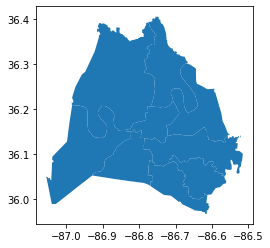

In [56]:
# Plot the School Districts without any additional arguments
school_district.plot()
plt.show()

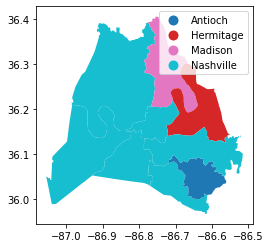

In [61]:
# Plot the School Districts, color them according to city, and show a legend
school_district.plot(column = 'city', legend = True)
plt.show()

## **Plotting points over polygons - part 1**

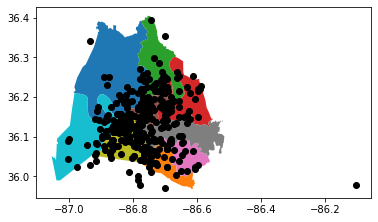

In [65]:
# Plot the service district shapefile
school_district.plot(column='district')

# Add the chicken locations
plt.scatter(x=chickens.lng, y=chickens.lat, c = 'black')

# Show the plot
plt.show()

## **Plotting points over polygons - part 2**

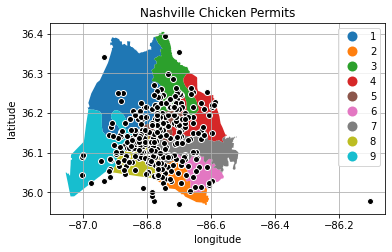

In [66]:
# Plot the service district shapefile
school_district.plot(column='district', legend=True)

# Add the chicken locations
plt.scatter(x=chickens.lng, y=chickens.lat, c='black', edgecolor = 'white')


# Add labels and title
plt.title('Nashville Chicken Permits')
plt.xlabel('longitude')
plt.ylabel('latitude')

# Add grid lines and show the plot
plt.grid()
plt.show()